## This notebook demonstrates the usage of SIDMpy, a python package to cmopute the central density of SIDM halos using a simple Jeans argument presented by Kaplinghat et al. 2016. For detailed documentation see the documentation in SIDMpy/sidmpy.py

In [5]:
from sidmpy.sidmpy import SIDMrho, SIDMrho_fromMz
from sidmpy.Profiles.sidm_profile import SIDMprofile
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15

### This code assumes a function form for the SIDM cross section given by 
### $\sigma\left(v\right) = \sigma_0 \left(\frac{v}{30 \rm{km} \ \rm{sec^{-1}}}\right)^{\rm{\alpha}}$
### i.e. it is a power law in velocity. v is the central velocity dispersion of the SIDM halo that is not known a-priori, you get v simultaneously with the central density by solving the Jeans Eqn. Note that the code only accepts negative values of $\alpha$ because positive numbers are unphysical. To use a velocity independent cross section, just set $\alpha=0$

### This code outputs the central density of the SIDM profile, $\rho_0$, as well as a natural definition of the core radius given by
### $r_c = r_s \left(\frac{\rho_s}{\rho_0}\right)$
### where $\rho_s$ is the central density normalization of the CDM halo that would be present without self interactions.

In [2]:
# specify the parameters describing an NFW halo: density normalization, scale radius, and the age of the halo
# units: M_sun / kpc^3, kpc, Gyr
rhos, rs, halo_age = 50062409, 0.617, 13.2

# specify the normalization of the cross section [cm^2/gram]
cross_norm = 6.
# specify the velocity dependence of the cross section 
v_dep = 0.6

out = SIDMrho(rhos, rs, halo_age, cross_norm, v_dep)
(central_density, velocity_dispersion, core_size_unitsrs, fit_quality, params) = out

print('log10(central density) of CDM profile: ', np.log10(rhos))
print('log10(central density) of SIDM profile: ', np.log10(central_density))
print('core radius (in units of rs)', core_size_unitsrs, rhos/central_density)
print('core radius in kpc', core_size_unitsrs * rs)

log10(central density) of CDM profile:  7.699511743998425
log10(central density) of SIDM profile:  7.913510364854225
core radius (in units of rs) 0.61 0.6109439650142384
core radius in kpc 0.37637


## You can do the same thing as above specifying mass, redshift, and collapse redshift instead of $\left(\rho_s, r_s, t_{\rm{halo}}\right)$ using the function SIDMrho_fromMz. If you do not specify a concentration, you need to install colossus http://www.benediktdiemer.com/code/colossus/ in order to evaluate the mass-concentration relation of the halo. 

In [3]:
# specify the parameters describing an NFW halo: density normalization, scale radius, and the age of the halo
# units: M_sun / kpc^3, kpc, Gyr
mass, redshift, collapse_redshift = 10**8, 0., 10

# either specify a halo concentration or install colossus to do it automatically
halo_concentration = None

out = SIDMrho_fromMz(mass, redshift, collapse_redshift, cross_norm, v_dep, c=halo_concentration)
(central_density, velocity_dispersion, core_size_unitsrs, fit_quality, params) = out

print('log10(central density) of CDM profile: ', np.log10(rhos))
print('log10(central density) of SIDM profile: ', np.log10(central_density))
print('core radius (in units of rs)', core_size_unitsrs, rhos/central_density)
print('core radius in kpc', core_size_unitsrs * rs)

log10(central density) of CDM profile:  7.699511743998425
log10(central density) of SIDM profile:  7.913510366781028
core radius (in units of rs) 0.61 0.6109439623037065
core radius in kpc 0.37637


### SIDMpy also lets you visualize the mass profile of the halo. The next cell generates three profiles: The NFW profile the halo would have in the absence of self interactions, the exact solution to the Jeans equation, and a "SIDM analytic", a profile that is given by
$\Large \rho = \frac{\rho_s}{\left(x^a + \beta^a\right)^{\frac{1}{a}}\left(1+x\right)^2}$
### where $\beta = \frac{r_c}{r_s}$ is the core radius introduced above and a=10 reproduces the rapid transition from core -> NFW profile near r_1. Note that the exact solution to the Jeans equation doesn't have much meaning beyond r_1 because particles don't thermalize and the equilibrium assumption breaks down. Both the NFW and SIDM exact profiles have the same mass within r_1 (doesn't look like it sometimes because of log-log plot), and the profiles match at r_1. 

(10000, 1000000000)

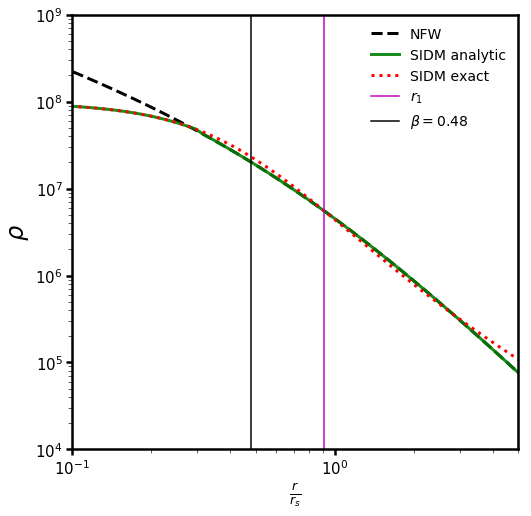

In [18]:
r = np.logspace(-1.5, 1.5, 100)

M, c, z = 10 ** 8, 17., 0.
cross_norm = 7.
v_dep = 0

profile = SIDMprofile(M, c, z, cross_norm, v_dep, z_collapse=collapse_redshift)

rhosidm, rhonfw = profile(r)
rhosidm_exact = profile.rho_isothermal
r_iso = profile.r_iso

fig = plt.figure(1)
fig.set_size_inches(8,8)
plt.loglog(r, rhonfw, color='k', linestyle='--', label='NFW', lw=3)
plt.loglog(r, rhosidm, color='g', label='SIDM analytic', alpha=0.9, lw=3)
plt.loglog(r_iso, rhosidm_exact, color='r', linestyle=':', label='SIDM exact', lw=3)

ax = plt.gca()
ax.axvline(profile.r_1, label=r'$r_1$', color='m')
ax.axvline(profile.rc_over_rs, label=r'$\beta = $'+str(profile.rc_over_rs), color='k')
plt.xlim(10**-1.5, 10**1.5)
plt.legend(fontsize=14, frameon=False)
plt.xlabel(r'$\frac{r}{r_s}$', fontsize=18)
plt.ylabel(r'$\rho$', fontsize=24)

plt.xlim(0.1, 5)
plt.ylim(10 ** 4, 10 ** 9)
#plt.loglog(r_iso, rhosidm_exact)